In [170]:
from mediapipe import solutions 
from mediapipe.framework.formats import landmark_pb2
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe.tasks import python 
from mediapipe.tasks.python import vision 
import wget

In [171]:
def draw_landmarks_on_image(rgb_image, detection_result):
    hand_landmarks_list = detection_result.hand_landmarks #tespit edilen elin işaretlendirmelerini içerir
    handedness_list = detection_result.handedness #tespit edilen elin sağ ve sol olma durumu
    annotated_image = np.copy(rgb_image) #girdi görüntüsü kopyalanır

    #tespit edilen elleri isaretlemek icin bir dongu 
    for idx in range(len(hand_landmarks_list)):
        hand_landmarks = hand_landmarks_list[idx] #indeksi kullanarak el isaretlenmesini alir 
        handedness = handedness_list[idx] #hangi el olduğu

        hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList() #bu formatta bir liste olusturur
        hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x = landmark.x, y = landmark.y, z = landmark.z) 
        for landmark in hand_landmarks])
        solutions.drawing_utils.draw_landmarks(# el işaretlemeleri görüntü üzerine çizilir
            annotated_image, 
            hand_landmarks_proto,
            solutions.hands.HAND_CONNECTIONS,
            solutions.drawing_styles.get_default_hand_landmarks_style(),
            solutions.drawing_styles.get_default_hand_connections_style()
        )
        height, width,_ = annotated_image.shape
        x_coordinates = [landmark.x for landmark in hand_landmarks]
        y_coordinates = [landmark.y for landmark in hand_landmarks]
        text_x = int(min(x_coordinates)*width)
        tex_y = int(min(y_coordinates)*height)-MARGIN

        cv2.putText(annotated_image, f"{handedness[0].category_name}", (text_x, tex_y),
                   cv2.FONT_HERSHEY_DUPLEX, FONT_SIZE, HANDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

    return annotated_image
        

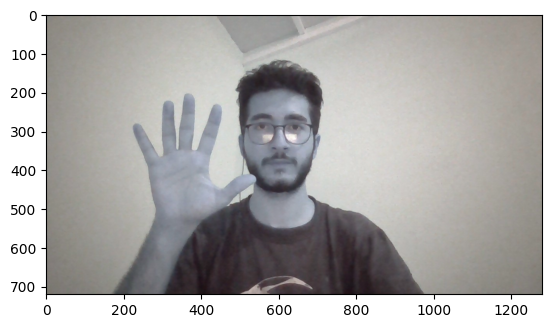

In [172]:
img= cv2.imread("data/el_tespiti_1.jpg")
plt.figure()
plt.imshow(img)

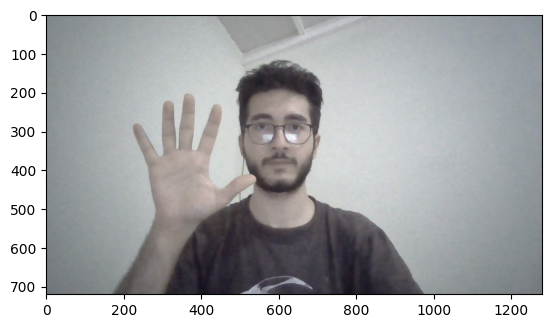

In [173]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

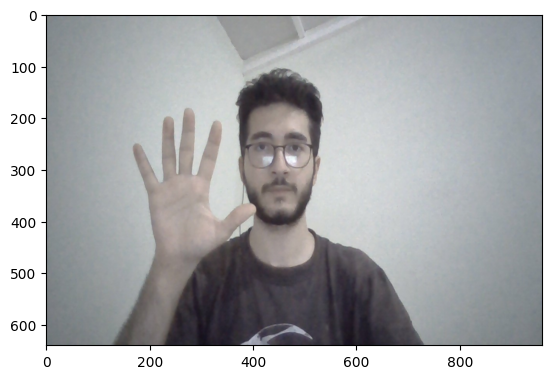

In [174]:
img= cv2.resize(img,(960,640))
plt.figure()
plt.imshow(img)

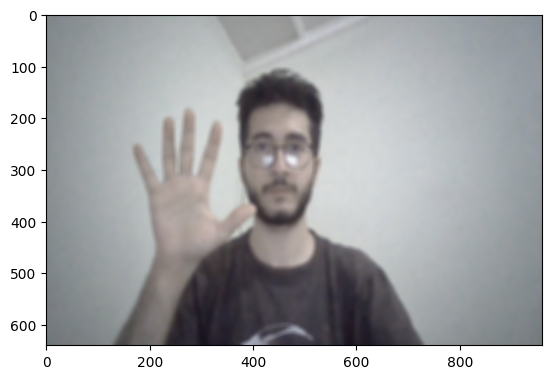

In [175]:
img=cv2.blur(img,(10,10))
plt.imshow(img,cmap="gray")

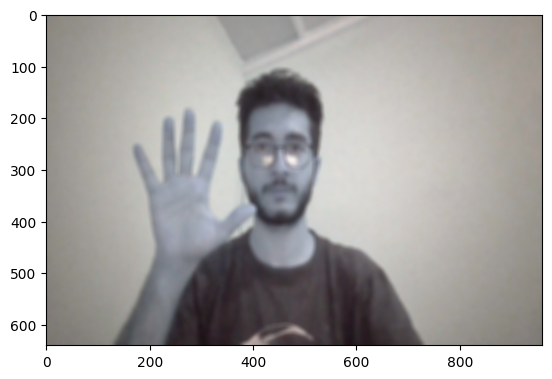

In [186]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

In [187]:
cv2.imwrite("data/el_tespit_odev.jpg",img)

True

In [188]:
MARGIN=10 
FONT_SIZE = 3 
FONT_THICKNESS = 2 
HANDNESS_TEXT_COLOR = (255,0,0)  

In [189]:
with open("hand_landmarker.task", "rb") as f:
  model_asset_buffer = f.read()

In [190]:
base_options = python.BaseOptions(model_asset_buffer=model_asset_buffer)
options = vision.HandLandmarkerOptions(base_options = base_options, num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

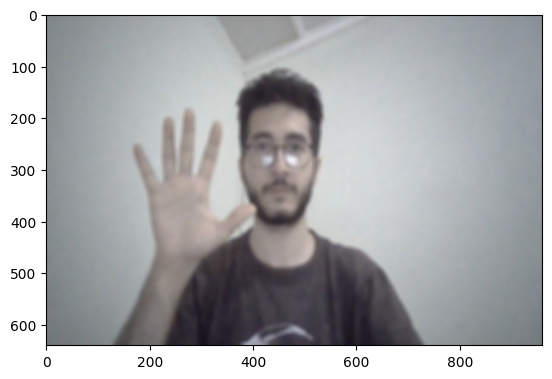

In [191]:
img = cv2.imread("data/el_tespit_odev.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

In [192]:
image = mp.Image.create_from_file("data/el_tespit_odev.jpg")
detection_result = detector.detect(image)

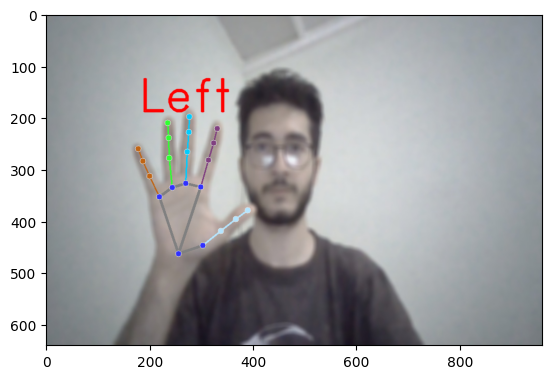

In [193]:
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.figure()
plt.imshow(annotated_image)

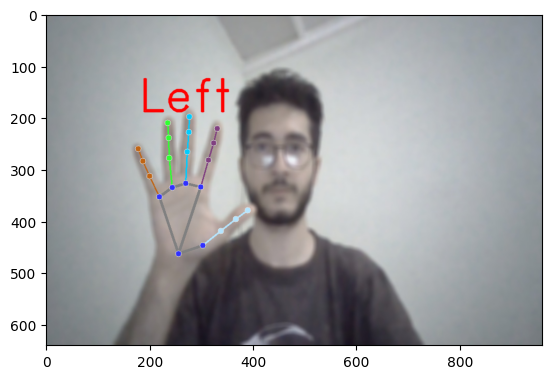

In [196]:
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
plt.figure()
plt.imshow(annotated_image)

In [197]:
cv2.imwrite("data/el_tespit_odev.jpg",annotated_image)

True